In [4]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [10]:
import pandas as pd
import pandas_datareader.data as data
import datetime

start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 5, 20)

df = data.DataReader('AAPL', 'yahoo', start, end)


TypeError: string indices must be integers, not 'str'

In [12]:
pip install alpha_vantage


                                              0.0/317.2 kB ? eta -:--:--
     -----------------------------------   307.2/317.2 kB 18.6 MB/s eta 0:00:01
     -------------------------------------- 317.2/317.2 kB 6.5 MB/s eta 0:00:00
                                              0.0/60.2 kB ? eta -:--:--
     ---------------------------------------- 60.2/60.2 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = 'GOVM9G6XFPM1AOMN'

# Define the stock symbol, start date, and end date
symbol = 'AAPL'
start = '2023-01-01'
end = '2023-05-20'

# Create an instance of the TimeSeries class
ts = TimeSeries(key=api_key, output_format='pandas')

# Retrieve the stock data
df, _ = ts.get_daily(symbol=symbol, outputsize='full')

# Filter the data within the desired date range
df = df.loc[start:end]

# Print the retrieved data
print(df)


ValueError: Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints

In [26]:
!pip install numpy




'pip' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [24]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = 'GOVM9G6XFPM1AOMN'

# Define the stock symbol, start date, and end date
symbol = 'AAPL'
start = '2023-01-01'
end = '2023-05-20'

# Create an instance of the TimeSeries class
ts = TimeSeries(key=api_key, output_format='pandas')

# Retrieve the stock data
df  = ts.get_daily(symbol=symbol, outputsize='full')

# Filter the data within the desired date range
df = df.loc[start:end]

# Print the retrieved data
print(df)


ValueError: Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints

In [27]:
import pandas_datareader.data as web

# Define the stock symbol and time range
symbol = 'AAPL'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Retrieve the stock data from Yahoo Finance
df = web.DataReader(symbol, 'yahoo', start_date, end_date)

# Print the retrieved data
print(df)


TypeError: string indices must be integers, not 'str'

In [28]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("AAPL", start="2023-01-01", end="2023-05-20")

ModuleNotFoundError: No module named 'yfinance'

In [29]:
pip install yfinance

                                              0.0/60.3 kB ? eta -:--:--
     ---------------------------------------- 60.3/60.3 kB 3.1 MB/s eta 0:00:00
                                              0.0/2.6 MB ? eta -:--:--
     ---------                                0.6/2.6 MB 12.6 MB/s eta 0:00:01
     --------------------------               1.8/2.6 MB 18.5 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 20.8 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 18.5 MB/s eta 0:00:00
                                              0.0/143.0 kB ? eta -:--:--
     ---------------------------------------- 143.0/143.0 kB ? eta 0:00:00
                                              0.0/112.2 kB ? eta -:--:--
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
                                              0.0/179.0 kB ? eta -:--:--
     ------------------------------------- 179.0/179.0 kB 11.3 MB/s eta 0:00:00
       

In [4]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
df = pdr.get_data_yahoo("AAPL", start="2010-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,129.030807,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.025940,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.676392,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.883209,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.750137,96452100


In [7]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [8]:
df=df.drop(['Date' ,'Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [9]:
plt.plot(df.Close)

NameError: name 'plt' is not defined

In [41]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    118.000475
2764    118.223525
2765    118.489800
2766    118.699475
2767    118.925550
Name: Close, Length: 2768, dtype: float64

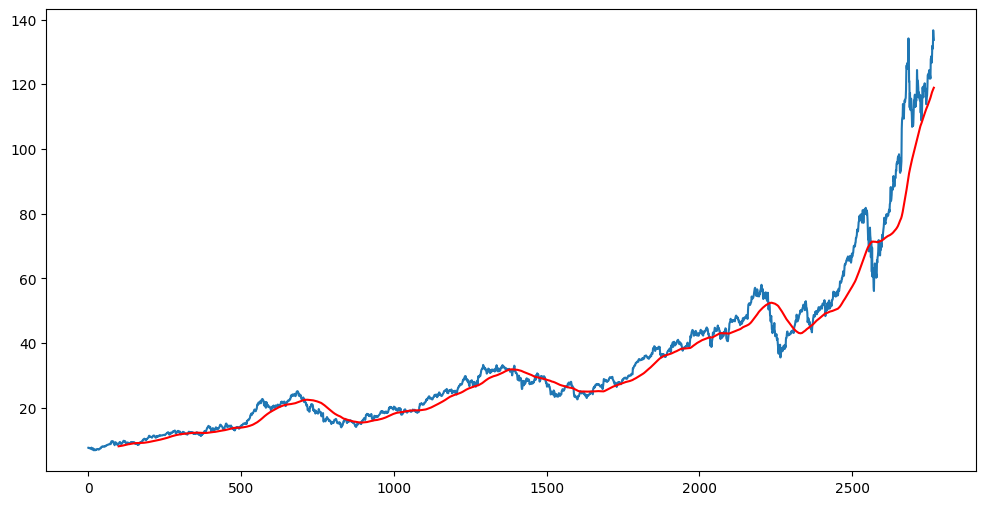

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [43]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763     98.809175
2764     99.158737
2765     99.494725
2766     99.866312
2767    100.218837
Name: Close, Length: 2768, dtype: float64

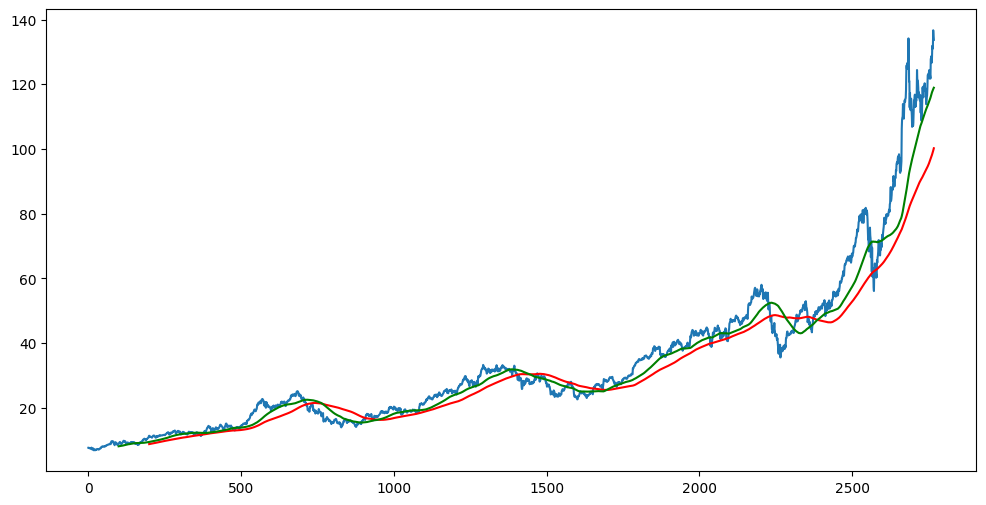

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'red')
plt.plot(ma100,'green')

In [46]:
df.shape

(2768, 5)

In [47]:
#Spliting Data into Training and Testing 

data_training =pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1937, 1)
(831, 1)


In [48]:
data_training.head()


,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [49]:
data_testing.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [50]:
#scalling the Data 

from sklearn.preprocessing import MixMaxScaler
scaler=MinMaxScaler(feature_range=(0.1))



ImportError: cannot import name 'MixMaxScaler' from 'sklearn.preprocessing' (c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [53]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [58]:
#scalling the Data 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))



In [3]:
data_traning_array=scaler.fit_transform(data_training)
data_traning_array

NameError: name 'scaler' is not defined

In [2]:
x_train=[]
y_train=[]

for i in range(100,data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100:i])
    y_train.append(data_traning_array[i,0])

    x_train,y_train=np.array(x_train),np.array(y_train)

NameError: name 'data_traning_array' is not defined

In [66]:
import numpy as np

In [1]:
x_train=[]
y_train=[]

for i in range(100,data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100:i])
    y_train.append(data_traning_array[i,0])

    x_train,y_train=np.array(x_train),np.array(y_train)

NameError: name 'data_traning_array' is not defined